In [73]:
import numpy
import scipy

import pyaudio
import wave
from matplotlib import pyplot as pp

In [74]:
AUDIO_FILE_PATH = "../assets/band_audio_clean.wav"
CHUNK = 256*(2**3)

In [75]:
AUDIO_FILE = wave.open(AUDIO_FILE_PATH)
P = pyaudio.PyAudio()
# AUDIO_FILE.getnframes()
# scipy.io.wavfile.write(filename=AUDIO_FILE_PATH, rate=sample, data=AUDIO_FILE.astype(numpy.int16))


# freq of sampling
SAMPLE_RATE = AUDIO_FILE.getframerate()

# 1/f
SAMPLE_TIME = 1/SAMPLE_RATE

# total num of frames
TOTAL_FRAMES = AUDIO_FILE.getnframes()

# duration of sample
SAMPLE_DURATION = CHUNK/SAMPLE_RATE

# angular freq
OMEGA = 2*numpy.pi 

print("SAMPLE_RATE : ", SAMPLE_RATE)
print("SAMPLE_TIME : ", SAMPLE_TIME)
print("TOTAL_FRAMES : ", TOTAL_FRAMES)
print("SAMPLE_DURATION : ", SAMPLE_DURATION)
print("OMEGA : ", OMEGA)

SAMPLE_RATE :  22050
SAMPLE_TIME :  4.5351473922902495e-05
TOTAL_FRAMES :  60086
SAMPLE_DURATION :  0.09287981859410431
OMEGA :  6.283185307179586


In [76]:
data = AUDIO_FILE.readframes(CHUNK)
# print(data)
arr = numpy.frombuffer(data, dtype=numpy.int64).astype(dtype=numpy.float64)
print(numpy.max(arr), numpy.min(arr))

x = numpy.arange(len(arr))*SAMPLE_TIME
sin_arr = numpy.sin(arr)

print(CHUNK, len(arr))
# pp.plot(x, sin_arr)
# print(numpy.max(arr), numpy.min(arr))

7.726605836668764e+17 -9.252192393446696e+17
2048 512


In [77]:
from IPython.display import Audio
Audio(AUDIO_FILE_PATH)

512 512


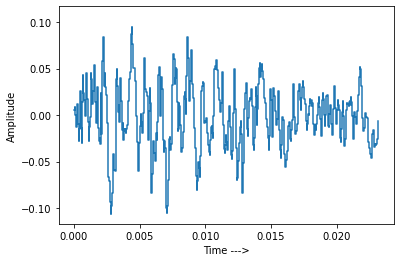

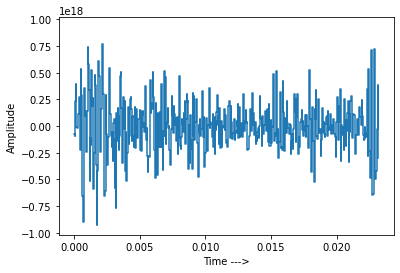

In [86]:
from librosa import display
from librosa import load
lib_samples, lib_sr = load(AUDIO_FILE_PATH, sr=None, mono=True, offset=0.0, duration=SAMPLE_DURATION/4)
# print(lib_samples[0:100])
print(len(lib_samples), len(arr))

pp.figure()
display.waveshow(y=lib_samples, sr=lib_sr)
pp.xlabel("Time --->")
pp.ylabel("Amplitude")
pp.show()

pp.figure()
display.waveshow(y=arr, sr=SAMPLE_RATE)
pp.xlabel("Time --->")
pp.ylabel("Amplitude")
pp.show()

0.037960615426015684 0.0015114290190492655
[0.00000000e+00 1.07666016e+01 2.15332031e+01 ... 2.20177002e+04
 2.20284668e+04 2.20392334e+04]


ValueError: x and y must have same first dimension, but have shapes (2048,) and (512,)

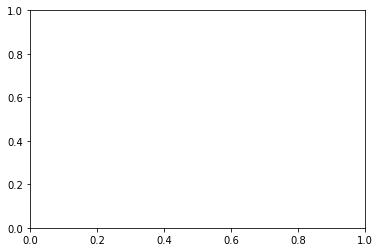

In [79]:
fft = numpy.fft.fft(sin_arr)/CHUNK
fft[1:] = 2*fft[1:]
fft = numpy.abs(fft)
print(numpy.max(fft), numpy.min(fft))
# print(fft)
# print(sin_arr)
# print(type(fft))
# print(numpy.abs(fft))
f = SAMPLE_RATE * numpy.arange(CHUNK)/CHUNK
print(f)
# pp.plot(sin_arr, numpy.abs(fft))
fig,ax = pp.subplots()
pp.plot(f,fft,linewidth=1)
ax.set_xscale('log')
ax.set_yscale('log')
pp.ylabel('Amplitude')
pp.xlabel('Frequency [Hz]')